## Importing a SpatialData dataset

SpatialData is a data framework for the access, alignment, and processing of uni- and multi-modal spatial omics datasets (https://doi.org/10.1038/s41592-024-02212-x). It builds upon the annData framework for spatially-resolved data and is becoming a common method of storing large multimodal datasets. In this tutorial, we'll demonstrate how to import spatial data contained in a SpatialData object into a MuSpAn domain using the `spatialdata_to_domain` reader function.

To reproduce this tutorial, download the MERFISH 'Mouse brain' dataset from SpatialData (https://spatialdata.scverse.org/en/stable/tutorials/notebooks/datasets/README.html).

We'll start by reading in the SpatialData object using the 'spatialdata' package.

In [1]:
# import required
import muspan as ms 
import spatialdata as sd

# Path to the spatial data file (.zarr) -- EDIT THIS PATH FOR YOUR OWN LOCAL DOWNLOAD LOCATION
path_to_spatialData_file='../../../spatialData_data/MERFISH-Mouse-brain.zarr'

# Load the spatial data file using the read_zarr function
test_sd=sd.read_zarr(path_to_spatialData_file)
print(test_sd)

SpatialData object, with associated Zarr store: /Users/joshuamoore/Dropbox/Ox_PostDoc/Code/spatialData_data/MERFISH-Mouse-brain.zarr
├── Images
│     └── 'rasterized': DataArray[cyx] (1, 522, 575)
├── Points
│     └── 'single_molecule': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'anatomical': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'cells': GeoDataFrame shape: (2389, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2389, 268)
with coordinate systems:
    ▸ 'global', with elements:
        rasterized (Images), single_molecule (Points), anatomical (Shapes), cells (Shapes)


We can see that the SpatialData object contains different partitions of data that we can access. In this example, we have 'Images','Points', 'Shapes' and 'Tables'. The spatial objects in this dataset are stored under 'Points' and 'Shapes'. These headers are further categorised by groups of objects predefined by the used. For example, under shapes, we have 'anatomical' and 'cells' which are annotated regions of the tissue and segmentated cells, respectively.

We can import this SpatialData object into MuSpAn using the `spatialdata_to_domain` function. The main parameter we give to this function is a spatialData object. In our case, this is 'test_sd'.

MuSpAn is looking for anything under the 'Points' or 'Shapes' headings in the SpatialData object to grab. We have to be careful with unpacking too much data as MuSpAn currently stores all objects in memory. 

In this MERFISH experiment, there are a lot of spatially-resolved points under 'single_molecule' which might not be relevent for spatial analysis. For this we can specify the objects to load into our domain using the `include_elements` parameter, which takes a list of spatial elements (objects) we'd like to add. Let's only include the 'cells' for now.



In [2]:
# pass the spatial data object to the muspan io to convert into a domain
domain=ms.io.spatialdata_to_domain(test_sd,include_elements=['cells'])

Domain name: spatialData domain
Number of objects: 2389
Collections: ['cells']
Labels: ['cell_id', 'radius', 'table: 1700022I11Rik', 'table: 1810046K07Rik', 'table: 5031425F14Rik', 'table: 5730522E02Rik', 'table: Acta2', 'table: Adam2', 'table: Adamts2', 'table: Adamts4', 'table: Adra1b', 'table: Alk', 'table: Ankfn1', 'table: Ano4', 'table: Aqp4', 'table: Asic4', 'table: B4galnt2', 'table: B4galnt3', 'table: Barx2', 'table: Bcl11b', 'table: Bdnf', 'table: Bgn', 'table: Blank-1', 'table: Blank-10', 'table: Blank-2', 'table: Blank-3', 'table: Blank-4', 'table: Blank-5', 'table: Blank-6', 'table: Blank-7', 'table: Blank-8', 'table: Blank-9', 'table: Blnk', 'table: Bmpr1b', 'table: Brinp3', 'table: C1ql3', 'table: C1qtnf7', 'table: Cacng5', 'table: Calb1', 'table: Calb2', 'table: Camk2d', 'table: Car3', 'table: Cbln2', 'table: Cbln4', 'table: Ccbe1', 'table: Ccdc162', 'table: Ccdc3', 'table: Ccdc80', 'table: Ccnb1', 'table: Cd14', 'table: Cd24a', 'table: Cd52', 'table: Cdca7', 'table: Cdc

Note that everything connected the spatial objects in the 'Tables' using the 'cell id' is unpacked from the annData tables and loaded into MuSpAn as labels. These labels are named by the annData table they are a part of. In this example, our SpatialData object has one addData data under the 'Tables' handing, named 'table', which contains transcript counts for all objects.

Let's visualise this domain colored by a specific transcript count.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

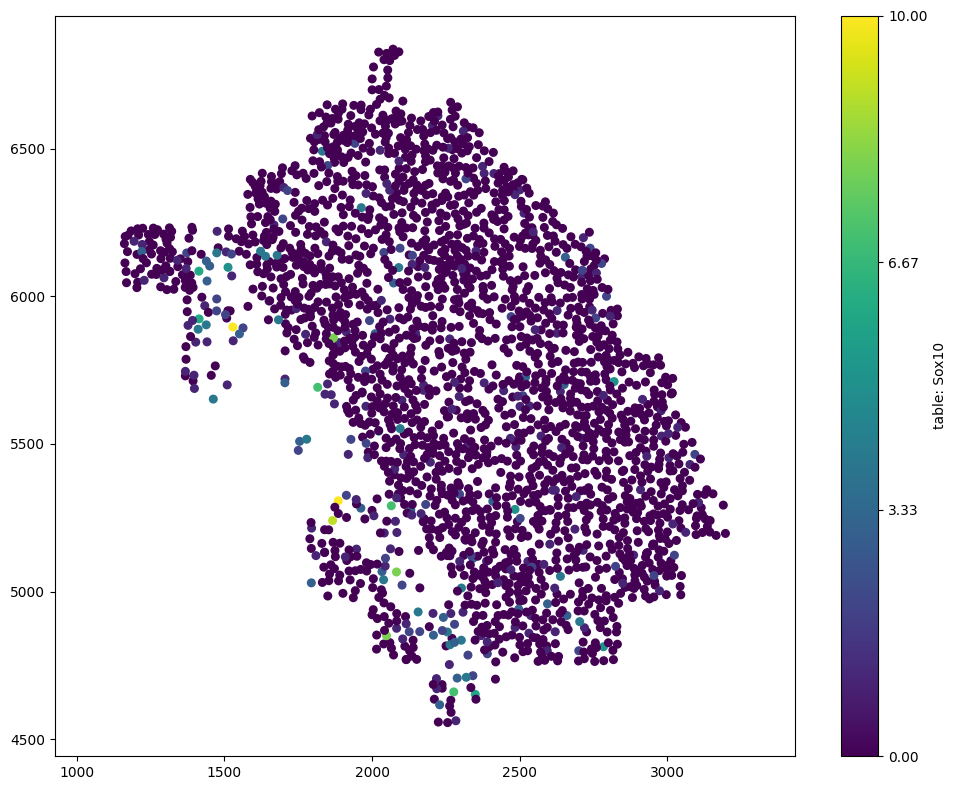

In [3]:
# Visualize the domain
# We will color the visualization by the 'Sox10' transcript count from the 'table'
# Set the marker size to 30 for better visibility
ms.visualise.visualise(domain, color_by='table: Sox10', marker_size=20)


If there is a lot of information in the spatialData object, we might only want to select specific labels to load. We can do this using the `annData_tables_and_vars` parameter which takes a dictionary keyed by the name of the anndata table and the entries being the variables we'd like to select.

In [4]:
# Convert the spatial data object into a MuSpAn domain
# We include specific elements ('cells') and select specific variables ('Sox10', 'Alk') from the annData table
domain_selected = ms.io.spatialdata_to_domain(
    test_sd,
    include_elements=['cells'],
    annData_tables_and_vars={'table': ['Sox10', 'Alk']}
)

Domain name: spatialData domain
Number of objects: 2389
Collections: ['cells']
Labels: ['cell_id', 'radius', 'table: Sox10', 'table: Alk'] 
Networks: [] 
Distance matrices: []


We can see now that we only have the intrinic object information (id and radius) and the 'Sox10' and 'Alk' labels from the annData table.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

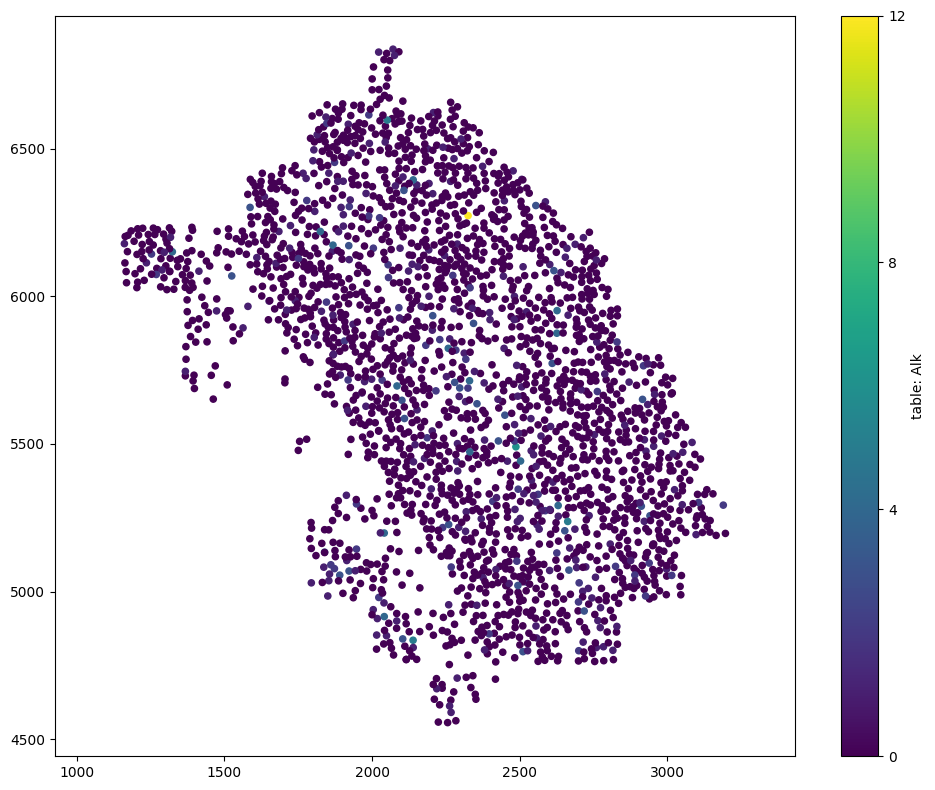

In [8]:
# Visualize the domain with selected labels
# We will color the visualization by the 'Alk' transcript count from the 'table'
# Set the marker size to 30 for better visibility
ms.visualise.visualise(domain_selected, color_by='table: Alk', marker_size=20)

In addition, these cells are saved as shapes. For computational efficiency in downstream spatial analysis, we convert any shape-like data into point-like data, by default. If we wanted to keep these shapes, we can use the `import_shapes_as_points` parameter and set this to false.

In this example, these cells are actually saved as shapes (circles of estimated radius).

In [6]:
# Convert the spatial data object into a MuSpAn domain, including specific elements and variables
# Set import_shapes_as_points to False to keep the shapes as they are
domain_selected_shapes = ms.io.spatialdata_to_domain(
    test_sd,
    include_elements=['cells'],
    annData_tables_and_vars={'table': ['Sox10', 'Alk']},
    import_shapes_as_points=False
)

Domain name: spatialData domain
Number of objects: 2389
Collections: ['cells']
Labels: ['cell_id', 'radius', 'table: Sox10', 'table: Alk'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

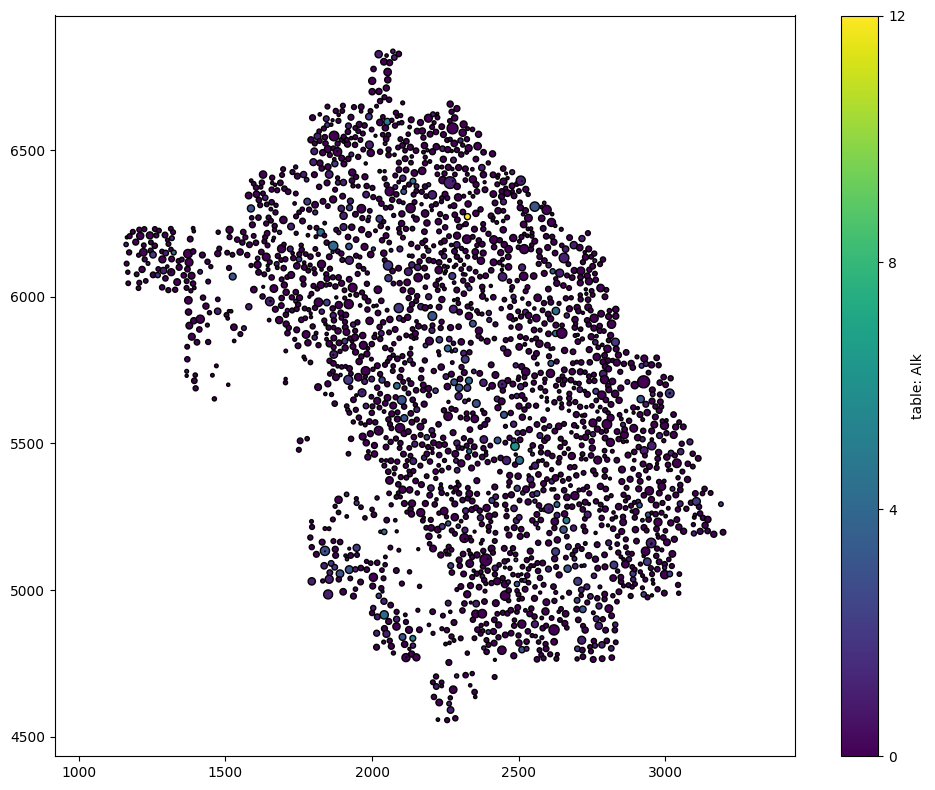

In [7]:
# Visualize the domain with selected shapes, colored by 'Alk' transcript count
# Set the alpha parameter to 1 for full opacity
ms.visualise.visualise(domain_selected_shapes, color_by='table: Alk', shape_kwargs=dict(alpha=1))

Now we can see the difference in cell 'size' as well as the counts of Alk.

This functionality should allow for extended spatial analysis of your spatialData datasets in MuSpAn. As always, we encourage checking out our documentation on `spatialdata_to_domain` to get the most out of it's functionality for your use case.

